In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score, \
accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from scipy.stats import skew
from sklearn.preprocessing import PowerTransformer
from sklearn import svm
from imblearn.combine import SMOTEENN
from collections import Counter
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold



In [2]:
df=pd.read_csv('/Users/nair/Downloads/ClassificationProblem1.txt',sep="\t")
df.head()

,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F14,F15,F16,F17,F18,F19,F20,F21,F22,C
0,1,0.224506,0.500340,0.489860,0.902413,7934,-6970,-5714,9982,-5697,...,-3433637453,10/4/1986,9/6/1992,2,1,706,305,1,2,0
1,2,0.321128,0.281119,0.907283,0.772159,-8238,1219,1663,1287,-3658,...,609277486,2/24/1979,1/5/1983,1,1,423,206,18,7,1
2,3,0.893441,0.622005,0.998776,0.098386,8540,5266,-9377,-3504,-4511,...,-8977995005,1/12/1989,11/22/1986,2,1,703,315,1,4,0
3,4,0.320641,0.957234,0.346000,0.646479,-7772,-383,9681,-8661,3474,...,4868760308,2/18/1982,6/10/1992,1,1,122,304,15,1,0
4,5,0.475961,0.623008,0.544988,0.159709,1571,-8039,-7961,-2385,4407,...,9757408267,4/10/1987,10/19/1985,1,1,486,240,1,1,0


In [3]:
# test data
df1=pd.read_csv('/Users/nair/Downloads/Classification1Test.txt',sep="\t")
df1.head()

,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22
0,T30234341,0.654765,0.812009,0.603190,0.391039,-5220,4825,-1784,7447,-7147,...,8074343777,5553595074,9/17/1996,8/18/1990,1,1,436,478,1,1
1,T30234342,0.694636,0.690568,0.473460,0.259760,-618,-5018,2012,9259,9267,...,-5556861821,2216284070,11/7/1985,4/11/1990,1,1,138,56,10,4
2,T30234343,0.203759,0.323301,0.492294,0.011448,-8778,6141,6965,3774,4303,...,-2121815725,-315409510,7/9/1984,5/4/1997,1,1,117,323,10,1
3,T30234344,0.319627,0.286247,0.906197,0.093840,-7929,4471,7715,9543,335,...,1389754605,-3360224957,6/3/1987,7/1/1988,1,1,115,149,16,21
4,T30234345,0.236003,0.782784,0.285689,0.383585,-3296,4564,-1580,-8559,-27,...,3653338555,7604838279,7/17/1984,12/3/1993,1,1,527,281,3,1


In [4]:
df1.shape

(19913, 23)

In [5]:
df.shape

(101180, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101180 entries, 0 to 101179
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Index   101180 non-null  int64  
 1   F1      101180 non-null  float64
 2   F2      101180 non-null  float64
 3   F3      101180 non-null  float64
 4   F4      101180 non-null  float64
 5   F5      101180 non-null  int64  
 6   F6      101180 non-null  int64  
 7   F7      101180 non-null  int64  
 8   F8      101180 non-null  int64  
 9   F9      101180 non-null  int64  
 10  F10     101180 non-null  int64  
 11  F11     101180 non-null  int64  
 12  F12     101180 non-null  int64  
 13  F13     101180 non-null  int64  
 14  F14     101180 non-null  int64  
 15  F15     101180 non-null  object 
 16  F16     101180 non-null  object 
 17  F17     101180 non-null  int64  
 18  F18     101180 non-null  int64  
 19  F19     101180 non-null  int64  
 20  F20     101180 non-null  int64  
 21  F21     10

In [7]:
df.isnull().sum().sum()

0

In [8]:
#Finding the unique values in percentagee..

obs=df.shape[0]
for col in df.columns:
    print(f"{col}-------{100*df[col].nunique()/obs}")

Index-------100.0
F1-------99.99604664953549
F2-------99.98912828622257
F3-------99.99901166238386
F4-------99.99802332476774
F5-------19.64419845819332
F6-------19.630361731567504
F7-------19.633326744415893
F8-------19.63431508203202
F9-------19.655070171970745
F10-------99.99901166238386
F11-------100.0
F12-------100.0
F13-------99.99802332476774
F14-------100.0
F15-------7.9373393951373785
F16-------6.22652698161692
F17-------0.00494168808064835
F18-------0.00494168808064835
F19-------0.6384661000197668
F20-------0.6384661000197668
F21-------0.02075508993872307
F22-------0.02075508993872307
C-------0.0019766752322593396


In [9]:
a=df.shape[0]
s=df.columns
for i in s:
    print (f"Unique values in {i} {(df[i].nunique())}")

Unique values in Index 101180
Unique values in F1 101176
Unique values in F2 101169
Unique values in F3 101179
Unique values in F4 101178
Unique values in F5 19876
Unique values in F6 19862
Unique values in F7 19865
Unique values in F8 19866
Unique values in F9 19887
Unique values in F10 101179
Unique values in F11 101180
Unique values in F12 101180
Unique values in F13 101178
Unique values in F14 101180
Unique values in F15 8031
Unique values in F16 6300
Unique values in F17 5
Unique values in F18 5
Unique values in F19 646
Unique values in F20 646
Unique values in F21 21
Unique values in F22 21
Unique values in C 2


In [10]:
high_cardinality_features=['F10','F11','F12','F13','F14']
#Dtype=int and High Cardinality hence dropped not requireddd

In [11]:
data_copy=df.copy()

In [12]:

data_copy.drop(columns=high_cardinality_features,inplace=True)

In [13]:
obs = data_copy.shape[0]
for col in data_copy.columns:
    print(f"{col}  - >     {100*data_copy[col].nunique()/obs}")

Index  - >     100.0
F1  - >     99.99604664953549
F2  - >     99.98912828622257
F3  - >     99.99901166238386
F4  - >     99.99802332476774
F5  - >     19.64419845819332
F6  - >     19.630361731567504
F7  - >     19.633326744415893
F8  - >     19.63431508203202
F9  - >     19.655070171970745
F15  - >     7.9373393951373785
F16  - >     6.22652698161692
F17  - >     0.00494168808064835
F18  - >     0.00494168808064835
F19  - >     0.6384661000197668
F20  - >     0.6384661000197668
F21  - >     0.02075508993872307
F22  - >     0.02075508993872307
C  - >     0.0019766752322593396


In [14]:
a=data_copy.columns
for i in a:
    print (f"unique values in {i} {data_copy[i].nunique()}")
    
    

unique values in Index 101180
unique values in F1 101176
unique values in F2 101169
unique values in F3 101179
unique values in F4 101178
unique values in F5 19876
unique values in F6 19862
unique values in F7 19865
unique values in F8 19866
unique values in F9 19887
unique values in F15 8031
unique values in F16 6300
unique values in F17 5
unique values in F18 5
unique values in F19 646
unique values in F20 646
unique values in F21 21
unique values in F22 21
unique values in C 2


In [15]:
#THese are date colums  are in objects so need to  sperate it to day date and month
date_columns=['F15', 'F16']

In [16]:
for col in date_columns:
    data_copy[col] = pd.to_datetime(data_copy[col])

In [17]:
# Date columns as month day year seperately for analysiss
data_copy['F15_Month'] = data_copy['F15'].dt.month
data_copy['F15_Day'] = data_copy['F15'].dt.day
data_copy['F15_Year'] = data_copy['F15'].dt.year
#THis is for the F16 columss
data_copy['F16_Month'] = data_copy['F16'].dt.month
data_copy['F16_Day'] = data_copy['F16'].dt.day
data_copy['F16_Year'] = data_copy['F16'].dt.year

In [18]:
data_copy.dtypes

Index                 int64
F1                  float64
F2                  float64
F3                  float64
F4                  float64
F5                    int64
F6                    int64
F7                    int64
F8                    int64
F9                    int64
F15          datetime64[ns]
F16          datetime64[ns]
F17                   int64
F18                   int64
F19                   int64
F20                   int64
F21                   int64
F22                   int64
C                     int64
F15_Month             int64
F15_Day               int64
F15_Year              int64
F16_Month             int64
F16_Day               int64
F16_Year              int64
dtype: object

In [19]:
#so date colums have been changeed into date time
 # Droppping the F15 and F16 colums as its no more needed
data_copy.drop(columns=['F15','F16'],inplace=True) 

# EDA

# UNIVARIENT ANALYSIS

/Users/nair/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


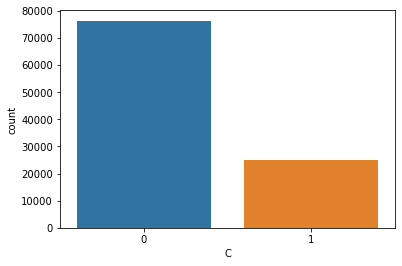

In [20]:
sns.countplot(data_copy['C'])
plt.show()  # Unbalanced dataset
#HEre class 0 is dominating 

/Users/nair/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


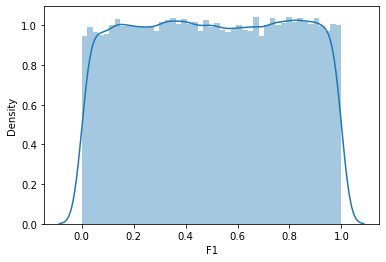

In [21]:
sns.distplot(data_copy['F1'])
plt.show()  #Uniformly distributed

/Users/nair/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


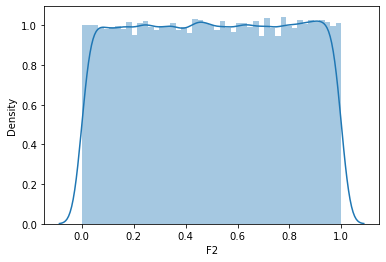

In [22]:
sns.distplot(data_copy['F2'])
plt.show()  #Uniformly distributed

/Users/nair/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


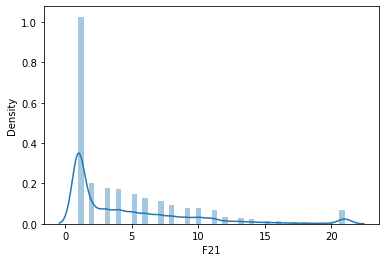

In [23]:
sns.distplot(data_copy['F21'])
plt.show() #Uniformly distributed

# PLotting for catergorical Data

/Users/nair/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


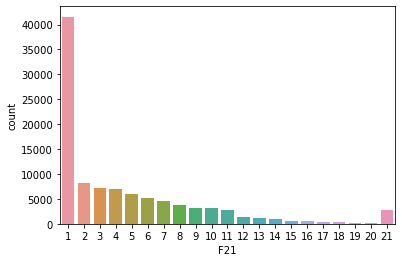

In [24]:
sns.countplot(data_copy['F21'])
plt.show() # Categorical Data

/Users/nair/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


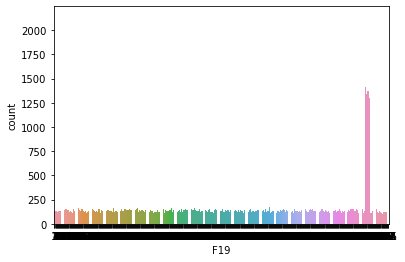

In [25]:
sns.countplot(data_copy['F19'])
plt.show() # Categorical Data

/Users/nair/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


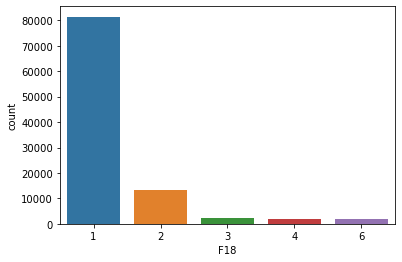

In [26]:
sns.countplot(data_copy['F18'])
plt.show()

/Users/nair/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


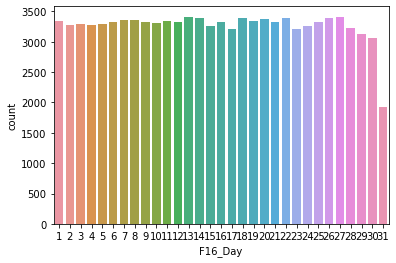

In [27]:
#PLotting YEar date and day

sns.countplot(data_copy['F16_Day'])
plt.show() 

/Users/nair/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


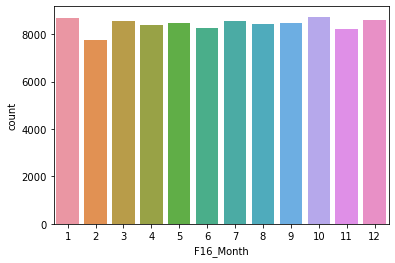

In [28]:
sns.countplot(data_copy['F16_Month'])
plt.show()

/Users/nair/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


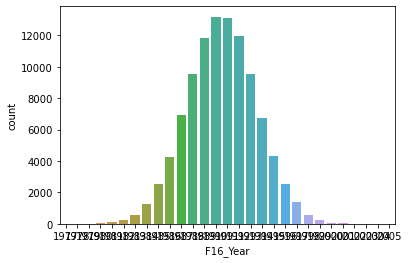

In [29]:
sns.countplot(data_copy['F16_Year'])
plt.show() 

/Users/nair/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


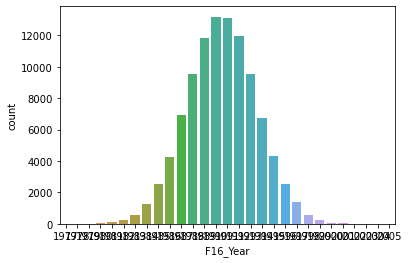

In [30]:
sns.countplot(data_copy['F16_Year'])
plt.show() 

/Users/nair/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


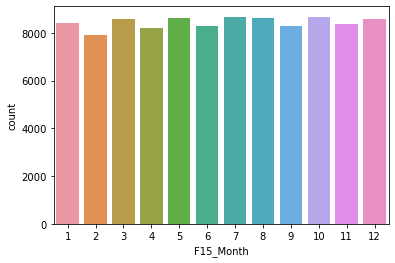

In [31]:
sns.countplot(data_copy['F15_Month'])
plt.show() 

<AxesSubplot:xlabel='C', ylabel='F15_Month'>

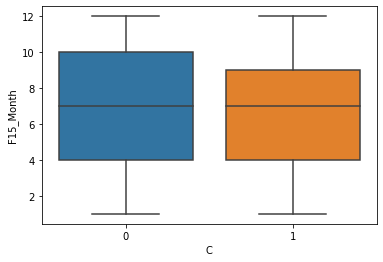

In [32]:
sns.boxplot(x='C',y='F15_Month',data=data_copy)

/Users/nair/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


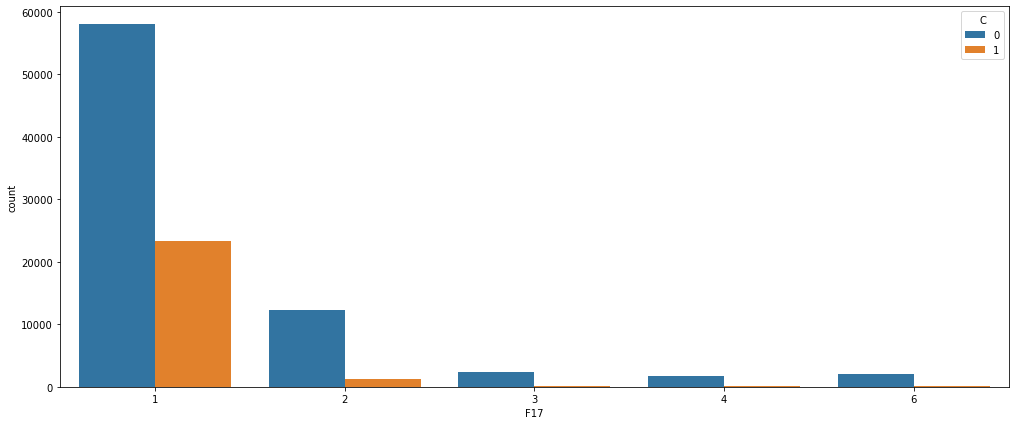

In [33]:
#Used for subplot for comparing the classses
plt.subplots(1,1,figsize=(17,7))
sns.countplot(data_copy['F17'],hue=data_copy['C'])
plt.show()

In [34]:
data_copy['F17'].value_counts()

1    81320
2    13536
3     2426
6     2139
4     1759
Name: F17, dtype: int64

In [35]:
data_copy['F18'].value_counts()

1    81432
2    13484
3     2436
6     2029
4     1799
Name: F18, dtype: int64

/Users/nair/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


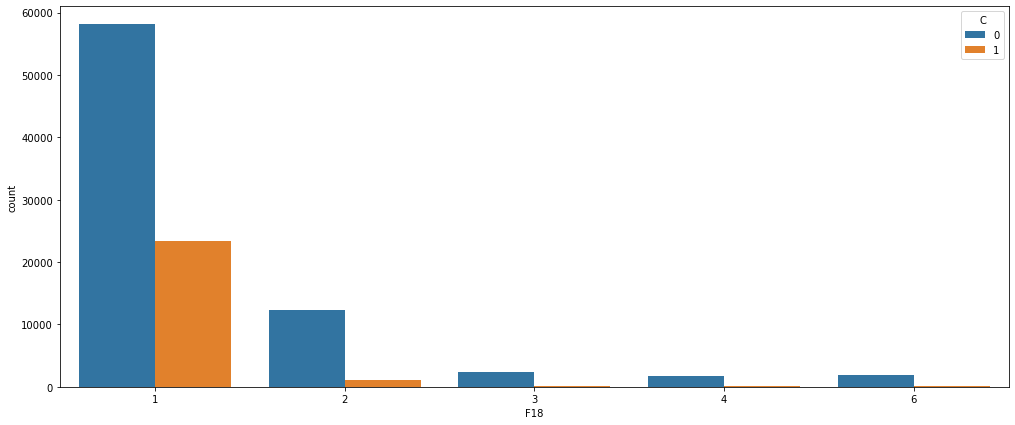

In [36]:
#Used for subplot for comparing the classses
plt.subplots(1,1,figsize=(17,7))
sns.countplot(data_copy['F18'],hue=data_copy['C'])
plt.show()

/Users/nair/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


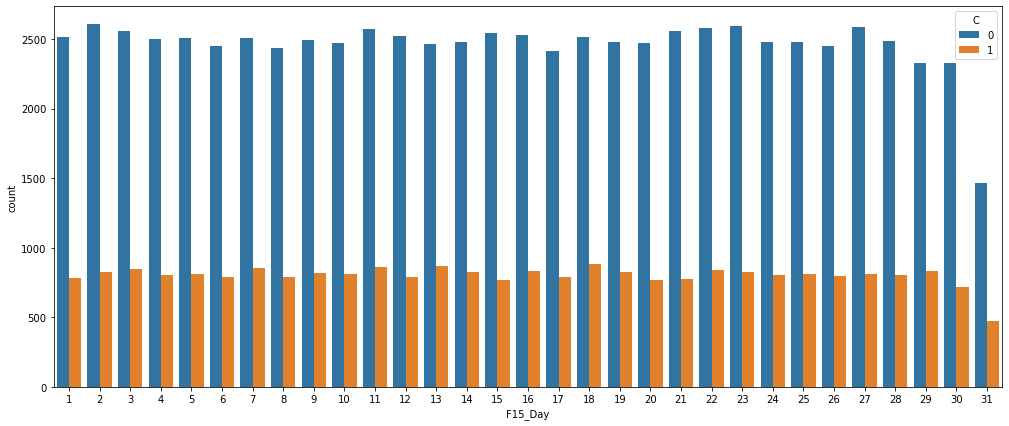

In [37]:
#Day wise analysis is giving indept intution.So plotting all the Day graphs of F15 and F16
plt.subplots(1,1,figsize=(17,7))
sns.countplot(data_copy['F15_Day'],hue=data_copy['C'])
plt.show()

/Users/nair/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


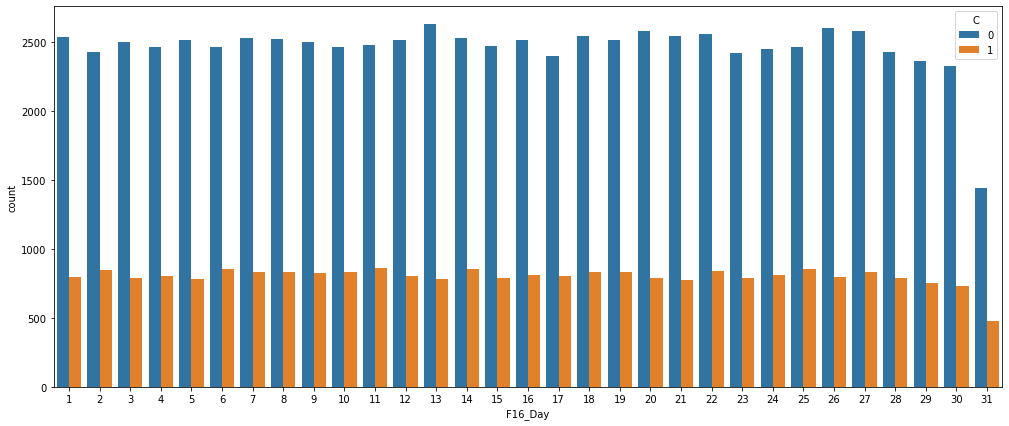

In [38]:
plt.subplots(1,1,figsize=(17,7))
sns.countplot(data_copy['F16_Day'],hue=data_copy['C'])
plt.show()

/Users/nair/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


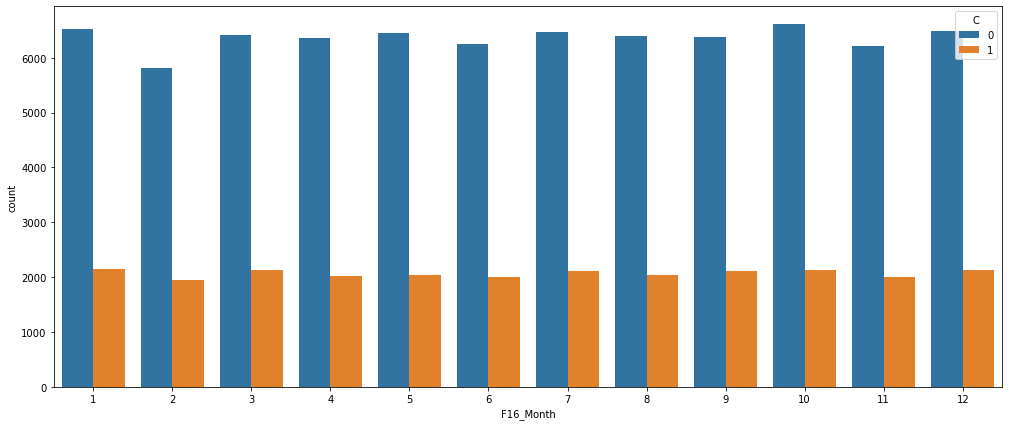

In [39]:
plt.subplots(1,1,figsize=(17,7))
sns.countplot(data_copy['F16_Month'],hue=data_copy['C'])
plt.show()

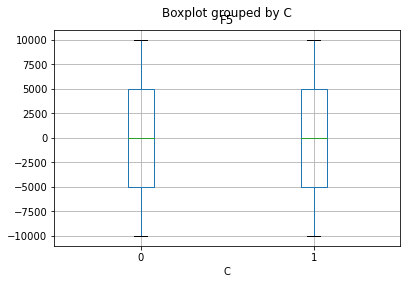

In [40]:
# Boxplot
data_copy.boxplot(column='F5', by='C')
plt.show()

#No outiler detected/

/Users/nair/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


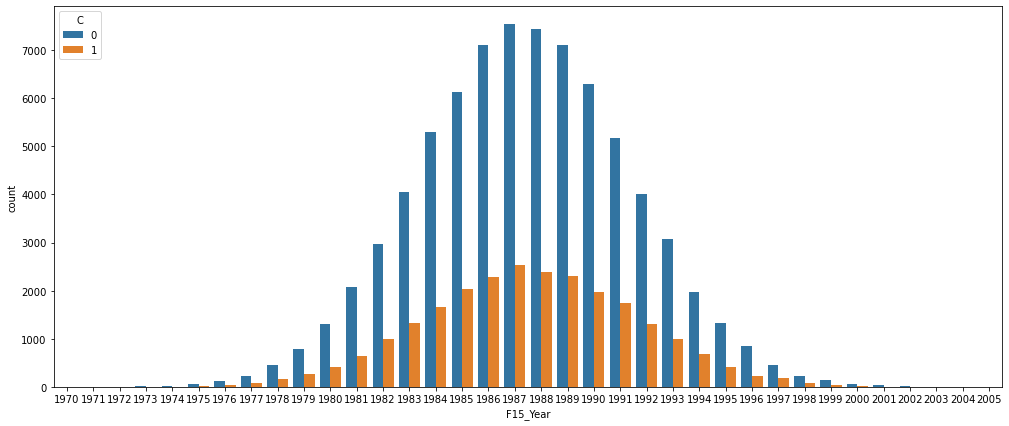

In [41]:
#Trying out with the year

plt.subplots(1,1,figsize=(17,7))
sns.countplot(data_copy['F15_Year'],hue=data_copy['C'])
plt.show()

/Users/nair/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


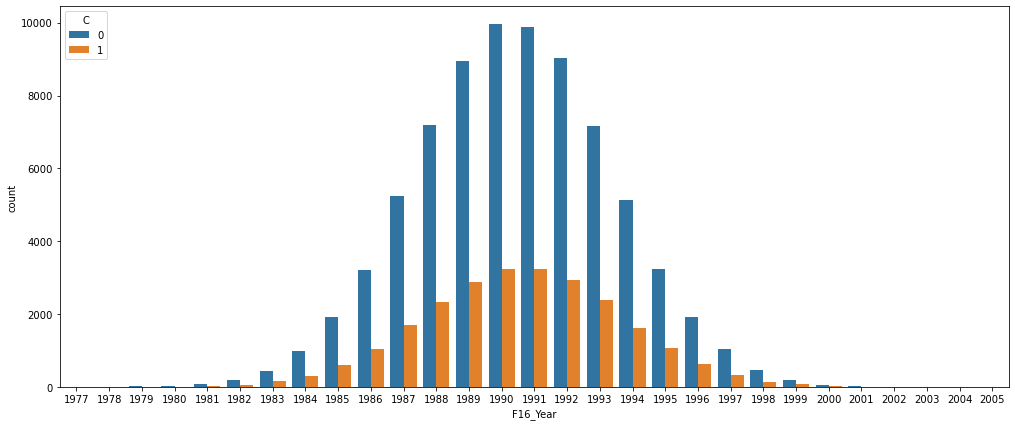

In [42]:
plt.subplots(1,1,figsize=(17,7))
sns.countplot(data_copy['F16_Year'],hue=data_copy['C'])
plt.show()

In [43]:
data_copy.columns

Index(['Index', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F17',
       'F18', 'F19', 'F20', 'F21', 'F22', 'C', 'F15_Month', 'F15_Day',
       'F15_Year', 'F16_Month', 'F16_Day', 'F16_Year'],
      dtype='object')

In [44]:
data_copy.drop(columns=['F15_Month', 'F15_Day','F16_Month', 'F16_Day'],inplace=True)

Now checking the skewness of the data


/Users/nair/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


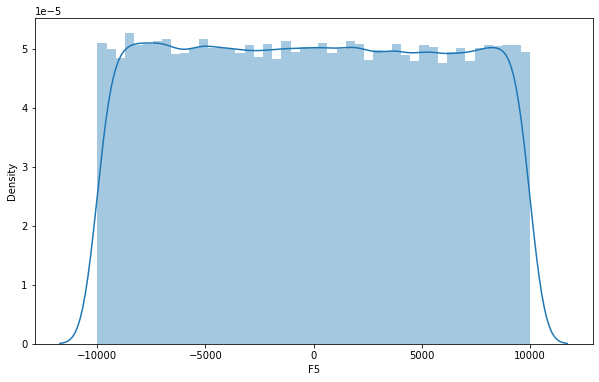

In [45]:
from scipy.stats import skew
plt.figure(figsize=(10,6))
sns.distplot(data_copy.F5) 
plt.show()

/Users/nair/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='F6', ylabel='Density'>

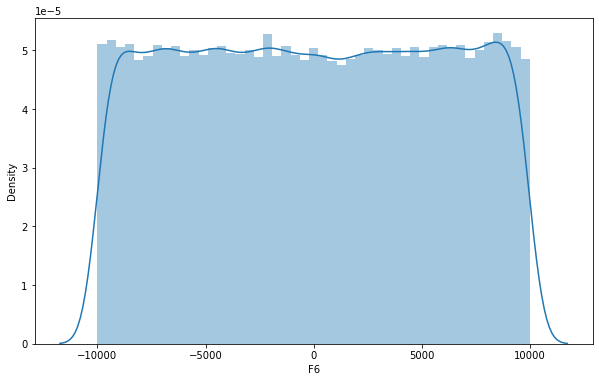

In [46]:
plt.figure(figsize=(10,6))
sns.distplot(data_copy.F6)

#Similar way we can plot for all the catergorical values like F7,F9 etc..

In [47]:
data_copy.C.value_counts()

0    76353
1    24827
Name: C, dtype: int64

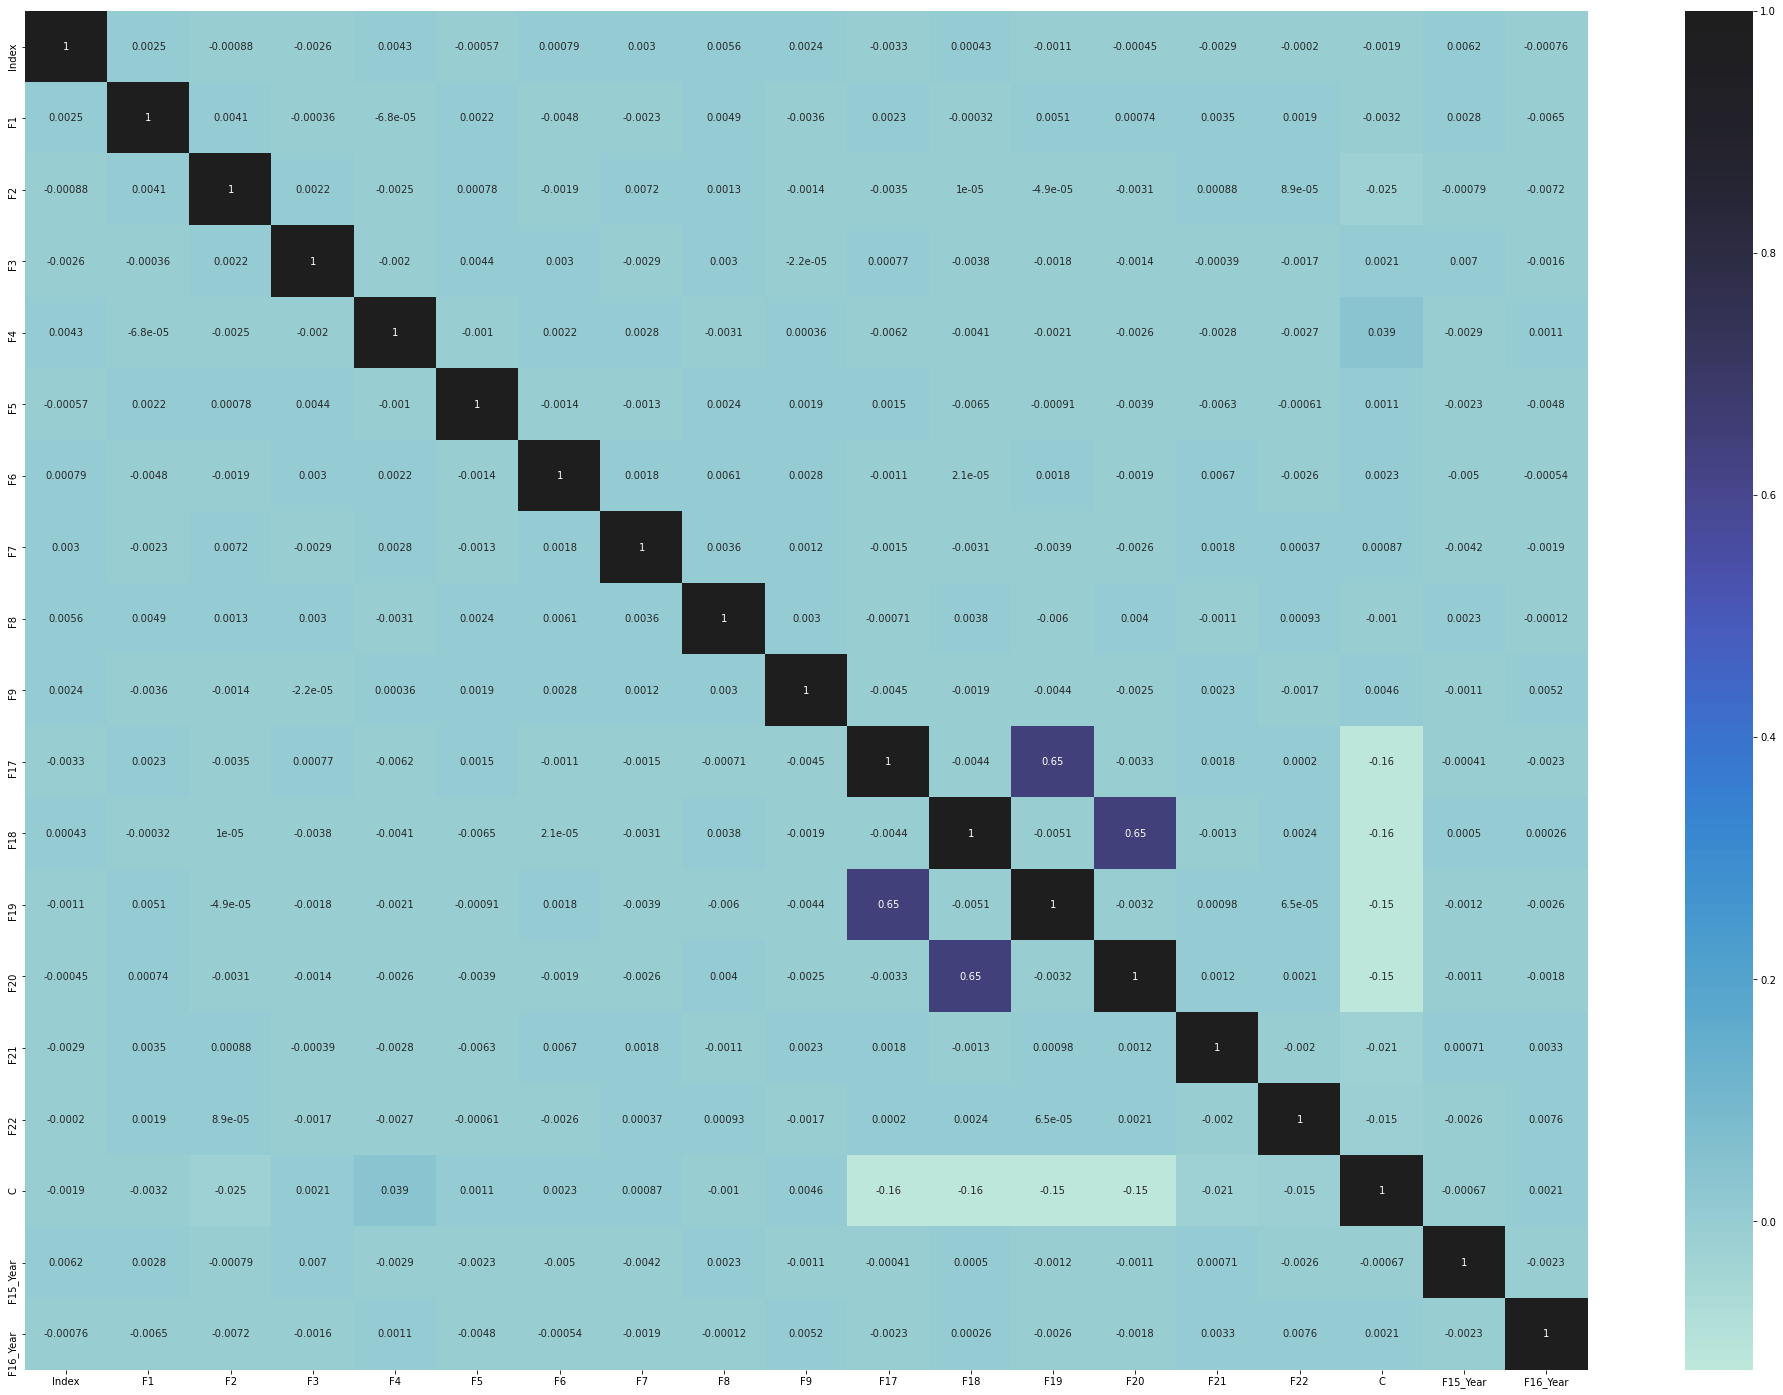

In [48]:
#get correlations of each features in dataset
corrmat = data_copy.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(35,25))
#plot heat map
g=sns.heatmap(data_copy[top_corr_features].corr(),annot=True,center=True,robust=True)

In [49]:
# creating a training set

df_train=data_copy[['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F17', 'F18',
       'F19', 'F20', 'F21', 'F22', 'C', 'F15_Year', 'F16_Year']]

In [50]:
df_train.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F17,F18,F19,F20,F21,F22,C,F15_Year,F16_Year
0,0.224506,0.500340,0.489860,0.902413,7934,-6970,-5714,9982,-5697,2,1,706,305,1,2,0,1986,1992
1,0.321128,0.281119,0.907283,0.772159,-8238,1219,1663,1287,-3658,1,1,423,206,18,7,1,1979,1983
2,0.893441,0.622005,0.998776,0.098386,8540,5266,-9377,-3504,-4511,2,1,703,315,1,4,0,1989,1986
3,0.320641,0.957234,0.346000,0.646479,-7772,-383,9681,-8661,3474,1,1,122,304,15,1,0,1982,1992
4,0.475961,0.623008,0.544988,0.159709,1571,-8039,-7961,-2385,4407,1,1,486,240,1,1,0,1987,1985


In [51]:
# diffentaiating the types of varibel
continous_features=['F1', 'F2', 'F3', 'F4','F5', 'F6', 'F7', 'F8', 'F9','F19', 'F20']
categorical_features=['F17', 'F18', 'F21', 'F22']

In [52]:
date_columns=['F15_Year', 'F16_Year'] #Using for appendind


In [53]:
for col in categorical_features:
    df_train[col] = df_train[col].astype(object)

<ipython-input-53-489023e6284f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[col] = df_train[col].astype(object)


In [54]:
for col in continous_features:
    df_train[col] = df_train[col].astype(float)

<ipython-input-54-3ceb2ce0bf34>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[col] = df_train[col].astype(float)


In [55]:
categorical_df = df_train[categorical_features]
cont_df = df_train[continous_features]
date_df=df_train[date_columns]

In [56]:
dummies_df = pd.get_dummies(data=df_train[categorical_features], drop_first=True)

In [57]:
dummies_df.head(2)

,F17_2,F17_3,F17_4,F17_6,F18_2,F18_3,F18_4,F18_6,F21_2,F21_3,...,F22_12,F22_13,F22_14,F22_15,F22_16,F22_17,F22_18,F22_19,F22_20,F22_21
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
for col in continous_features:
    print(f"{col} {skew(cont_df[col])}")

F1 -0.005717206290624233
F2 -0.005972011200821198
F3 0.0002519381536661913
F4 -0.0005455347113646256
F5 0.008294478298824065
F6 -0.0010676313796049702
F7 -0.0010708473294930658
F8 -0.008812172956906752
F9 -0.0029404707804210864
F19 0.22363260661064183
F20 0.2160966367956378


In [59]:
df_concat = pd.concat([cont_df, dummies_df,date_df], axis=1)

In [60]:
df_concat.head(2)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F19,...,F22_14,F22_15,F22_16,F22_17,F22_18,F22_19,F22_20,F22_21,F15_Year,F16_Year
0,0.224506,0.500340,0.489860,0.902413,7934.0,-6970.0,-5714.0,9982.0,-5697.0,706.0,...,0,0,0,0,0,0,0,0,1986,1992
1,0.321128,0.281119,0.907283,0.772159,-8238.0,1219.0,1663.0,1287.0,-3658.0,423.0,...,0,0,0,0,0,0,0,0,1979,1983


In [61]:
X = df_concat
y = data_copy['C']

In [62]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 10)

In [63]:
Counter(y_train)

# there is a class imabalance probelm So using the oversmaping techiniques

Counter({0: 61082, 1: 19862})

In [64]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
X_train = X_train_oversampled
y_train=y_train_oversampled

In [65]:
Counter(y_train)

Counter({0: 61082, 1: 61082})

In [66]:
X_train.shape,y_train.shape #this is giving equal result

((122164, 61), (122164,))

In [67]:
params = dict()
params['penalty'] = ['l1', 'l2', 'elasticnet']
params['C'] = [1, 0.9, 1.1]
params['class_weight'] = ['balanced', None]
params['solver'] = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

In [68]:
lg = LogisticRegression(n_jobs=-1)

In [69]:
cv = StratifiedKFold(n_splits=5, random_state=10, shuffle=True)

In [70]:
randomSearch = RandomizedSearchCV(estimator=lg, param_distributions=params, cv=cv, n_jobs=-1, scoring='accuracy')
result = randomSearch.fit(X_train, y_train)

/Users/nair/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.76549556        nan]
  warnings.warn(


In [71]:
result.best_estimator_

LogisticRegression(C=0.9, n_jobs=-1, solver='newton-cg')

In [72]:
result.best_score_

0.7654955601288701

In [73]:
lg_best = result.best_estimator_

In [74]:
lg_best.fit(X_train, y_train)

LogisticRegression(C=0.9, n_jobs=-1, solver='newton-cg')

In [75]:
y_predicted_train_lg = lg_best.predict(X_train)

In [76]:
accuracy_score(y_train, y_predicted_train_lg)

0.7662732065092827

In [77]:
y_predicted_test_lg = lg_best.predict(X_val)

In [78]:
accuracy_score(y_val, y_predicted_test_lg)

0.65106740462542

In [79]:
precision = precision_score(y_val, y_predicted_test_lg)
print(precision)

0.36030391895494535


In [80]:
recall = recall_score(y_val, y_predicted_test_lg)
print(recall)

0.5444108761329305


In [81]:
f1 = f1_score(y_val, y_predicted_test_lg)
print(f1)

0.43362476939119277


In [82]:
# logistic regreaaion
lg.fit(X_train, y_train)

LogisticRegression(n_jobs=-1)

In [83]:
y_predicted_train = lg.predict(X_train)

In [84]:
accuracy_score(y_train, y_predicted_train)

0.68757571788743

In [85]:
y_predicted_test = lg.predict(X_val)

In [86]:
accuracy_score(y_val, y_predicted_test)

0.6155860842063648

In [87]:
print(classification_report(y_val, y_predicted_test_lg))

              precision    recall  f1-score   support

           0       0.82      0.69      0.75     15271
           1       0.36      0.54      0.43      4965

    accuracy                           0.65     20236
   macro avg       0.59      0.62      0.59     20236
weighted avg       0.71      0.65      0.67     20236



In [88]:
print('Accuracy on training set:',lg.score(X_train,y_train))
print('Accuracy on test set:',lg.score(X_val,y_val))

Accuracy on training set: 0.68757571788743
Accuracy on test set: 0.6155860842063648


In [89]:
from sklearn.naive_bayes import GaussianNB
nb_clf= GaussianNB()
nb_clf.fit(X_train, y_train)

GaussianNB()

In [90]:
print('Accuracy on training set:',nb_clf.score(X_train,y_train))
print('Accuracy on test set:',nb_clf.score(X_val,y_val))

Accuracy on training set: 0.6782931141743885
Accuracy on test set: 0.5125024708440403


In [91]:
from sklearn.tree import DecisionTreeClassifier
dec_clf = DecisionTreeClassifier()
dec_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [92]:
print('Accuracy on training set',dec_clf.score(X_train, y_train))
print('Accuracy on test set:',dec_clf.score(X_val, y_val))

Accuracy on training set 1.0
Accuracy on test set: 0.6551690057323581


In [93]:
from xgboost import XGBClassifier
xgb_clf= XGBClassifier()
xgb_clf.fit(X_train, y_train)

[22:45:44] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/nair/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [94]:
from sklearn.metrics import accuracy_score
print('Accuracy score on train_data: ', accuracy_score(y_true = y_train, y_pred = xgb_clf.predict(X_train).round()))
print('Accuracy score on test_data: ', accuracy_score(y_true = y_val, y_pred = xgb_clf.predict(X_val).round()))

Accuracy score on train_data:  0.8200288137258112
Accuracy score on test_data:  0.6813105356789879


In [95]:
params = dict()
params['n_estimators'] = [100]
params['criterion'] = ['gini', 'entropy']
params['max_depth'] = [80]
params['max_samples'] = [0.7]
params['max_features'] = [1]
params['class_weight']=['balanced_subsample']

In [96]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_jobs=-1, random_state=10, oob_score=True, bootstrap=True)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=10)

In [97]:
randomSearch = RandomizedSearchCV(estimator=rf_clf, param_distributions=params, cv=cv, n_jobs=-1, scoring='accuracy')

In [98]:
result = randomSearch.fit(X_train, y_train)

/Users/nair/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/nair/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [99]:
result.best_estimator_

RandomForestClassifier(class_weight='balanced_subsample', max_depth=80,
                       max_features=1, max_samples=0.7, n_jobs=-1,
                       oob_score=True, random_state=10)

In [100]:
result.best_score_

0.8141760112809736

In [101]:
rfc_best = result.best_estimator_

In [102]:
rfc_best.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=80,
                       max_features=1, max_samples=0.7, n_jobs=-1,
                       oob_score=True, random_state=10)

In [103]:
y_predicted_train_rfc = rfc_best.predict(X_train)

In [104]:
accuracy_score(y_train, y_predicted_train_rfc)

0.9890311384695982

In [105]:
y_predicted_test_rfc = rfc_best.predict(X_val)

In [106]:
accuracy_score(y_val, y_predicted_test_rfc)

0.7266752322593398

In [107]:
f1 = f1_score(y_val, y_predicted_test_rfc)
print(f1)

0.27878471769461466


In [108]:
print('Accuracy on training set:',rf_clf.score(X_train,y_train))
print('Accuracy on test set:',rf_clf.score(X_val,y_val))

Accuracy on training set: 1.0
Accuracy on test set: 0.729047242538051


In [120]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#create new a knn model
knn = KNeighborsClassifier()

In [123]:
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 5)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=10)
knn_gscv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4])})

In [124]:
knn_gscv

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4])})

In [125]:
knn_gscv.best_score_

0.8160509039252475

In [109]:
# As of now Random forest is giving maxmum accuracy


In [131]:
#perfomring on Test dataset
test=pd.read_csv('/Users/nair/Downloads/Classification1Test.txt',sep="\t")
test_df=test

test_df=test[['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 
              'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20',
       'F21', 'F22']]

In [111]:
high_cardinality_features=['F10','F11','F12','F13','F14']
#Dtype=int and High Cardinality hence dropped not requireddd

In [132]:

test_df.drop(columns=high_cardinality_features,inplace=True)

/Users/nair/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [133]:
#THese are date colums  are in objects so need to  sperate it to day date and month
date_columns=['F15', 'F16']

In [134]:
for col in date_columns:
    test_df[col] = pd.to_datetime(test_df[col])

<ipython-input-134-22c7ea6bc292>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[col] = pd.to_datetime(test_df[col])


In [135]:
# Date columns as month day year seperately for analysiss
test_df['F15_Month'] = test_df['F15'].dt.month
test_df['F15_Day'] = test_df['F15'].dt.day
test_df['F15_Year'] = test_df['F15'].dt.year
#THis is for the F16 columss
test_df['F16_Month'] = test_df['F16'].dt.month
test_df['F16_Day'] = test_df['F16'].dt.day
test_df['F16_Year'] = test_df['F16'].dt.year

<ipython-input-135-89077caf26eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['F15_Month'] = test_df['F15'].dt.month
<ipython-input-135-89077caf26eb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['F15_Day'] = test_df['F15'].dt.day
<ipython-input-135-89077caf26eb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [136]:
#so date colums have been changeed into date time
 # Droppping the F15 and F16 colums as its no more needed
test_df.drop(columns=['F15','F16'],inplace=True) 

In [137]:
test_df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F17,...,F19,F20,F21,F22,F15_Month,F15_Day,F15_Year,F16_Month,F16_Day,F16_Year
0,0.654765,0.812009,0.603190,0.391039,-5220,4825,-1784,7447,-7147,1,...,436,478,1,1,9,17,1996,8,18,1990
1,0.694636,0.690568,0.473460,0.259760,-618,-5018,2012,9259,9267,1,...,138,56,10,4,11,7,1985,4,11,1990
2,0.203759,0.323301,0.492294,0.011448,-8778,6141,6965,3774,4303,1,...,117,323,10,1,7,9,1984,5,4,1997
3,0.319627,0.286247,0.906197,0.093840,-7929,4471,7715,9543,335,1,...,115,149,16,21,6,3,1987,7,1,1988
4,0.236003,0.782784,0.285689,0.383585,-3296,4564,-1580,-8559,-27,1,...,527,281,3,1,7,17,1984,12,3,1993


In [138]:
test_df.drop(columns=['F15_Month', 'F15_Day','F16_Month', 'F16_Day'],inplace=True)

In [139]:
test_train=test_df[['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F17', 'F18',
       'F19', 'F20', 'F21', 'F22', 'F15_Year', 'F16_Year']]

In [143]:
date_columns=['F15_Year', 'F16_Year']

In [140]:
for col in categorical_features:
    test_train[col] = test_train[col].astype(object)

In [141]:
for col in continous_features:
    test_train[col] = test_train[col].astype(float)

In [144]:
categorical_tdf = test_train[categorical_features]
cont_tdf = test_train[continous_features]
date_tdf=test_train[date_columns]

In [145]:
dummies_tdf = pd.get_dummies(data=test_train[categorical_features], drop_first=True)

In [146]:
test_concat = pd.concat([cont_tdf, dummies_tdf,date_tdf], axis=1)

In [147]:
test_concat.shape,cont_tdf.shape, dummies_tdf.shape

((19913, 61), (19913, 11), (19913, 48))

In [150]:
X = df_concat
y = data_copy['C']

In [151]:
X_Test= test_concat

In [156]:
y_final_output = rfc_best.predict(X_Test)
len(y_final_output)

19913

In [157]:
test['C-Outout']=y_final_output

In [163]:
test.columns 

Index(['Index', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10',
       'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20',
       'F21', 'F22', 'C-Outout'],
      dtype='object')

In [164]:
test.drop(columns=['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10',
       'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20',
       'F21', 'F22'],inplace=True) 

In [165]:
test.to_csv('Testt_final.csv', index=False)

In [ ]:
# perfomed all the operation on test and saved the file 